<a href="https://colab.research.google.com/github/wahyuvlntn/Promotion-Acceptance-Prediction/blob/main/Promotion_Acceptance_Prediction_Find_IT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestCentroid
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
import datetime as dt

In [122]:
data = pd.read_csv('train_features.csv')
data.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [ ]:
data_test = pd.read_csv('test_features.csv')
data_test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [123]:
y = pd.read_csv('train_labels.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [5]:
data.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [6]:
print(data.isnull().sum())

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64


Terdapat cukup banyak missing value terutama pada fitur tanggal_menjadi_anggota, hal ini bisa dikonsiderasi untuk didrop.

In [ ]:
data = pd.concat([data, y], axis=1)

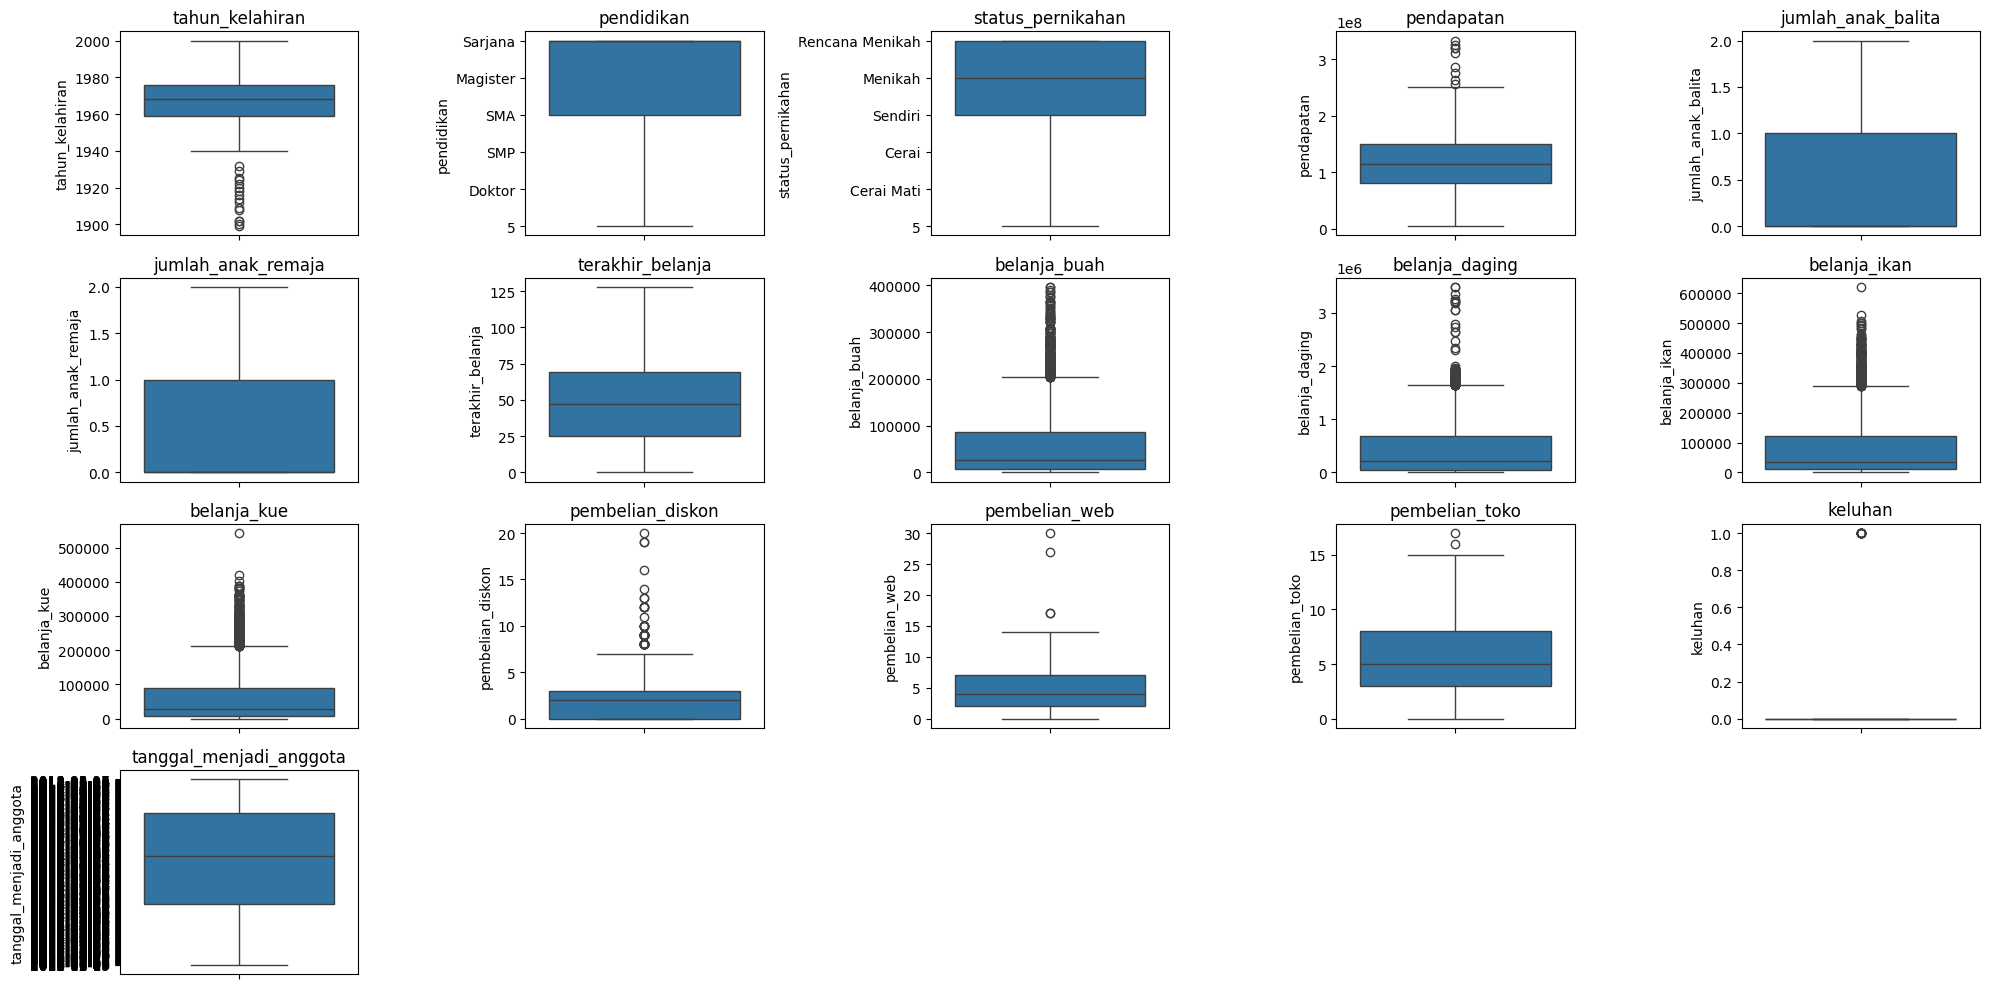

In [7]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(data.columns):
    plt.subplot(4, 5, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=data[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

Terdapat cukup banyak outliers pada fitur belanja_buah, belanja_daging, belanja_ikan, belanja_kue.

In [8]:
data['pendidikan'].value_counts()

pendidikan
Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
5              2
Name: count, dtype: int64

In [124]:
data['pendidikan'] = data['pendidikan'].map({'Sarjana': 2, 'Magister': 3, 'SMA': 1, 'Doktor': 3, 'SMP': 1, '5': 1})
data['status_pernikahan'] = data['status_pernikahan'].map({'Rencana Menikah': 1, 'Menikah': 2, 'Sendiri': 1, 'Cerai': 1, 'Cerai Mati': 1, '5': 1})

In [ ]:
data_test['pendidikan'] = data_test['pendidikan'].map({'Sarjana': 2, 'Magister': 3, 'SMA': 1, 'Doktor': 3, 'SMP': 1, '5': 1})
data_test['status_pernikahan'] = data_test['status_pernikahan'].map({'Rencana Menikah': 1, 'Menikah': 2, 'Sendiri': 1, 'Cerai': 1, 'Cerai Mati': 1, '5': 1})

Pada fitur pendidikan dan status_pernikahan dilakukan mapping sesuai jenjang pendidikan dan status pernikahannya. Pada fitur status_pernikahan selain 'Menikah' maka akan dimapping sebagai angka 1 dikarenakan dihitung sebagai 1 individu.

In [125]:
current_year = dt.datetime.now().year
data['umur'] = current_year - data['tahun_kelahiran']
# data_test['umur'] = current_year - data_test['tahun_kelahiran']

In [62]:
data.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,umur
0,1979,2.0,1.0,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,45
1,1950,2.0,1.0,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,74
2,1966,2.0,2.0,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,58
3,1961,3.0,1.0,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,63
4,1970,2.0,1.0,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,54


In [126]:
data = data.drop(columns=['tanggal_menjadi_anggota'])
# data_test = data_test.drop(columns=['tanggal_menjadi_angg/ota'])

In [127]:
imputer = KNNImputer(n_neighbors=5)
# imputer = IterativeImputer()

data['pendapatan'] = data['pendapatan'].fillna(data['pendapatan'].median())
data['belanja_buah'] = data['belanja_buah'].fillna(data['belanja_buah'].median())
data['belanja_daging'] = data['belanja_daging'].fillna(data['belanja_daging'].median())
data['belanja_ikan'] = data['belanja_ikan'].fillna(data['belanja_ikan'].median())
data['belanja_kue'] = data['belanja_kue'].fillna(data['belanja_kue'].median())

# data_test['pendapatan'] = data_test['pendapatan'].fillna(data_test['pendapatan'].median())
# data_test['belanja_buah'] = data_test['belanja_buah'].fillna(data_test['belanja_buah'].median())
# data_test['belanja_daging'] = data_test['belanja_daging'].fillna(data_test['belanja_daging'].median())
# data_test['belanja_ikan'] = data_test['belanja_ikan'].fillna(data_test['belanja_ikan'].median())
# data_test['belanja_kue'] = data_test['belanja_kue'].fillna(data_test['belanja_kue'].median())

data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
# data_test = pd.DataFrame(imputer.fit_transform(data_test), columns=data_test.columns)

Mengisi missing values dengan KNN imputer dan nilai median

In [128]:
data['total_orang_dirumah'] = data['status_pernikahan'] + data['jumlah_anak_balita'] + data['jumlah_anak_remaja']
data['belanja'] = data['pendapatan'] - (data['belanja_buah'] + data['belanja_daging'] + data['belanja_ikan'] + data['belanja_kue'])
data['pembelian'] = data['pembelian_diskon'] + data['pembelian_web'] + data['pembelian_toko']

In [ ]:
data_test['total_orang_dirumah'] = data_test['status_pernikahan'] + data_test['jumlah_anak_balita'] + data_test['jumlah_anak_remaja']
data_test['belanja'] = data_test['pendapatan'] - (data_test['belanja_buah'] + data_test['belanja_daging'] + data_test['belanja_ikan'] + data_test['belanja_kue'])
data_test['pembelian'] = data_test['pembelian_diskon'] + data_test['pembelian_web'] + data_test['pembelian_toko']

In [15]:
data.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,umur,total_orang_dirumah,belanja,pembelian
0,1979.0,2.0,1.0,115621394.0,0.0,1.0,42.2,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,45.0,2.0,115239047.0,9.0
1,1950.0,2.0,1.0,84063000.0,1.2,0.2,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,74.0,2.4,83911275.0,19.0
2,1966.0,2.0,2.0,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,58.0,2.0,126907579.0,9.0
3,1961.0,3.0,1.0,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,63.0,1.0,163605780.0,15.0
4,1970.0,2.0,1.0,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,54.0,3.0,117226606.0,18.0


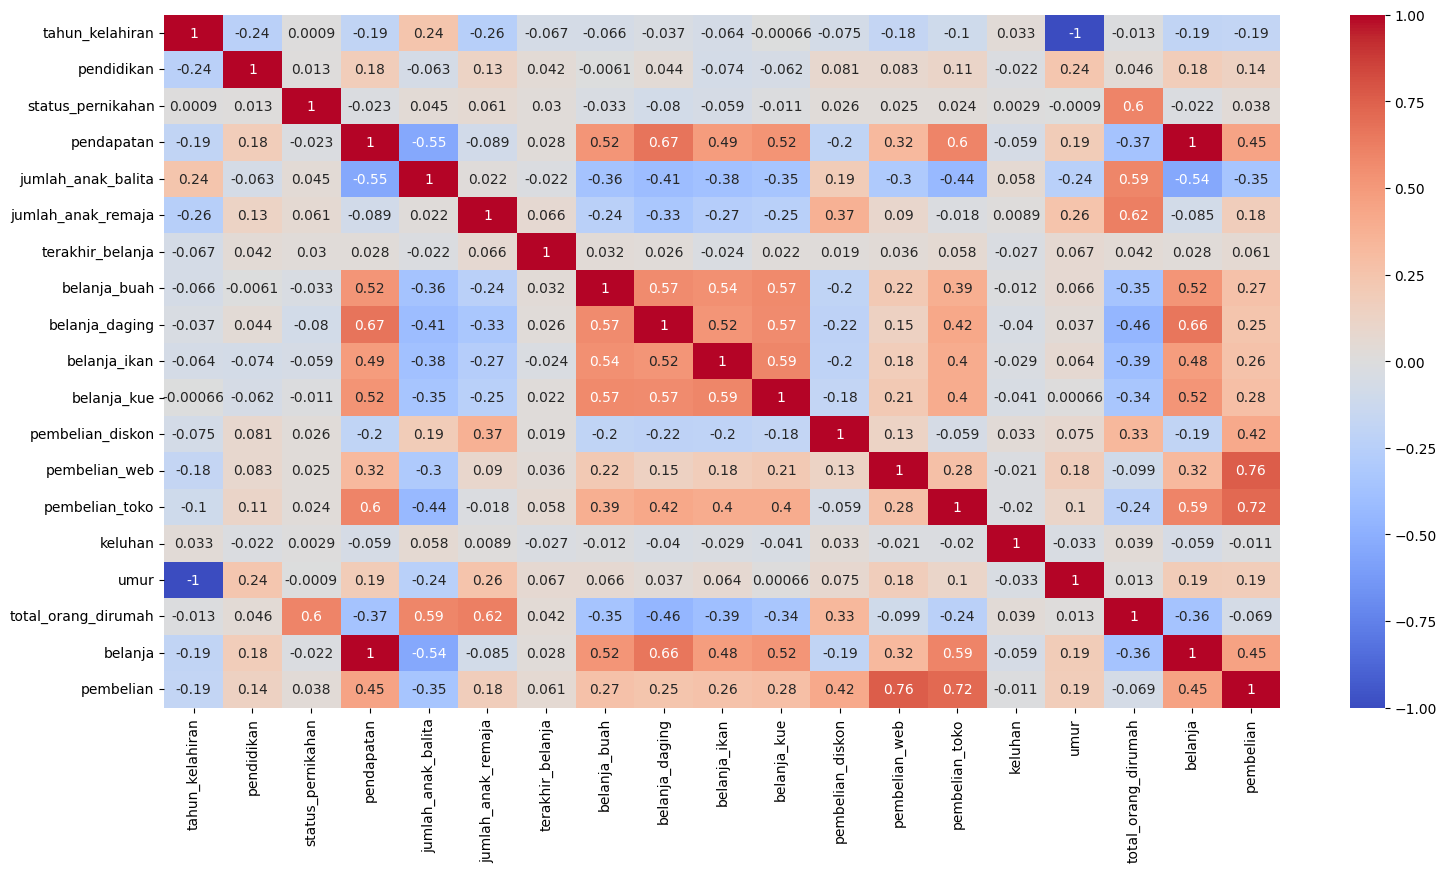

In [104]:
correlation_matrix = data.corr()

# Membuat Heatmap
plt.figure(figsize = (18, 9))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

# Menambahkan judul
plt.show()

In [129]:
data = data.drop(columns=['tahun_kelahiran'])

In [ ]:
data.describe()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,total_orang_dirumah,belanja,pembelian
count,3817.000000,3817.000000,3817.000000,3.817000e+03,3817.000000,3817.000000,3817.000000,3817.000000,3.817000e+03,3817.000000,3817.000000,3817.000000,3817.000000,3817.000000,3817.000000,3817.000000,3.817000e+03,3817.000000
mean,1967.823946,2.201729,1.308881,1.145398e+08,0.292533,0.353471,47.180823,58222.884988,4.284749e+05,79134.714828,61383.012313,2.114173,4.439874,5.749227,0.005030,1.954886,1.139126e+08,12.303275
std,11.768131,0.661796,0.453252,4.236538e+07,0.468314,0.486973,26.676326,72594.990959,5.020397e+05,97921.321912,77608.980718,2.068895,2.975535,3.184681,0.068953,0.847445,4.190452e+07,5.420882
min,1899.000000,1.000000,1.000000,5.073000e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.579279e+06,0.000000
25%,1959.000000,2.000000,1.000000,8.260853e+07,0.000000,0.000000,25.000000,8092.000000,5.259800e+04,10337.000000,8092.000000,0.800000,2.000000,3.000000,0.000000,1.000000,8.241336e+07,8.000000
50%,1968.000000,2.000000,1.000000,1.156214e+08,0.000000,0.000000,47.000000,26456.000000,2.219930e+05,36054.500000,27795.000000,2.000000,4.000000,5.000000,0.000000,2.000000,1.152390e+08,13.000000
75%,1976.000000,3.000000,2.000000,1.479535e+08,1.000000,1.000000,68.000000,81740.000000,6.403940e+05,115037.000000,84522.000000,3.000000,6.200000,8.000000,0.000000,2.400000,1.474523e+08,16.000000
max,2000.000000,3.000000,2.000000,3.328840e+08,2.000000,2.000000,128.000000,396508.000000,3.489675e+06,621600.000000,542164.000000,20.000000,30.000000,17.000000,1.000000,5.000000,3.293618e+08,37.600000


In [ ]:
data.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,total_orang_dirumah,belanja,pembelian
0,1979.0,2.0,1.0,115621394.0,0.0,1.0,42.2,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2.0,115239047.0,9.0
1,1950.0,2.0,1.0,84063000.0,1.2,0.2,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2.4,83911275.0,19.0
2,1966.0,2.0,2.0,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,2.0,126907579.0,9.0
3,1961.0,3.0,1.0,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,1.0,163605780.0,15.0
4,1970.0,2.0,1.0,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,3.0,117226606.0,18.0


In [ ]:
data_test = data_test.drop(columns=["ID"])

In [130]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 42)

In [131]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [132]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
label = pd.read_csv('test_features.csv')

# Random Forest

In [135]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=2000, random_state=42)

# Latih model Random Forest pada data latih
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi kinerja model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi Macro F1-Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("\nMacro F1-Score:", macro_f1)

<ipython-input-135-68857bf3260c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Confusion Matrix:
[[136  17  13   6   7   7   9]
 [ 38  51   7   6   6   7   5]
 [ 13   5  55   3   2   0   1]
 [  6   1   0  68   4   4   1]
 [  1   1   0   0  89   0   0]
 [  5   2   0   0   3 107   3]
 [  5   5   3   3   2   1  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       195
           1       0.62      0.42      0.50       120
           2       0.71      0.70      0.70        79
           3       0.79      0.81      0.80        84
           4       0.79      0.98      0.87        91
           5       0.85      0.89      0.87       120
           6       0.75      0.75      0.75        75

    accuracy                           0.74       764
   macro avg       0.74      0.75      0.74       764
weighted avg       0.73      0.74      0.73       764


Macro F1-Score: 0.7394894405482565


In [ ]:
X_test = scaler.transform(data_test)

y_pred = rf_model.predict(X_test)

# Tampilkan hasil prediksi
result_df = pd.DataFrame({
    'ID': label['ID'],
    'jumlah_promosi': y_pred
})

print(result_df)

        ID  jumlah_promosi
0     2241               1
1     2274               0
2     1107               2
3     4478               1
4     5080               4
...    ...             ...
3813   271               0
3814  3334               1
3815  3478               1
3816    89               4
3817  2151               6

[3818 rows x 2 columns]


In [ ]:
result_df.to_csv('/content/submission_wahyu_oversampleRF2.csv', index=False)

# Bagging

In [134]:
# Inisialisasi model Decision Tree
base_model = DecisionTreeClassifier()

# Inisialisasi model Bagging
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=2000, random_state=42)

# Melatih model Bagging
bagging_model.fit(X_train, y_train)

# Membuat prediksi
y_pred = bagging_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi Macro F1-Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("\nMacro F1-Score:", macro_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion Matrix:
[[131  23   8   7   8  10   8]
 [ 32  55   6   9   6   6   6]
 [ 11   2  55   3   2   3   3]
 [  9   2   0  64   5   3   1]
 [  1   2   1   0  86   0   1]
 [  3   5   0   1   2 106   3]
 [  5   7   2   1   1   2  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       195
           1       0.57      0.46      0.51       120
           2       0.76      0.70      0.73        79
           3       0.75      0.76      0.76        84
           4       0.78      0.95      0.86        91
           5       0.82      0.88      0.85       120
           6       0.72      0.76      0.74        75

    accuracy                           0.73       764
   macro avg       0.73      0.74      0.73       764
weighted avg       0.72      0.73      0.72       764


Macro F1-Score: 0.7308737496327641


In [ ]:
result_df = pd.DataFrame({
    'jumlah_promosi': y_pred
})

print(result_df)

In [ ]:
X_test = scaler.transform(data_test)

y_pred = bagging_model.predict(X_test)

# Tampilkan hasil prediksi
result_df = pd.DataFrame({
    'ID': label['ID'],
    'jumlah_promosi': y_pred
})

print(result_df)

# LightGBM

In [133]:
# Konversi dataset ke format LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Parameters untuk LightGBM
params = {
    'objective': 'multiclass',
    'num_class': 7,
    'metric': 'multi_logloss',
    'learning_rate': 0.08,  # Menurunkan learning rate
    # 'boosting': 'rf',
    'num_leaves': 70  # Meningkatkan num_leaves
}

# Training model LightGBM
num_round = 300
lgb_model = lgb.train(params, train_data, num_round)

# Membuat prediksi
y_pred_prob = lgb_model.predict(X_test)
y_pred = [list(x).index(max(x)) for x in y_pred_prob]

# Evaluasi menggunakan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi Macro F1-Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("\nMacro F1-Score:", macro_f1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 18
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
result_df = pd.DataFrame({
    'jumlah_promosi': y_pred
})

print(result_df)

     jumlah_promosi
0                 3
1                 5
2                 3
3                 0
4                 4
..              ...
759               0
760               4
761               5
762               1
763               2

[764 rows x 1 columns]


In [ ]:
data_test.head()

,ID,pendidikan,status_pernikahan,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,umur,total_orang_dirumah
0,2241,2.0,NaN,120660151.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,67,NaN
1,2274,3.0,2.0,163551821.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,56,3.0
2,1107,1.0,2.0,29857000.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,56,2.0
3,4478,3.0,2.0,117949098.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,53,3.0
4,5080,2.0,1.0,164761134.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,50,1.0


In [ ]:
X_test = scaler.transform(data_test.drop('ID', axis=1))

In [ ]:
X_test = imputer.transform(X_test)

In [ ]:
# X_test = scaler.transform(data_test)

y_pred_prob = lgb_model.predict(X_test)
y_pred = [list(x).index(max(x)) for x in y_pred_prob]

# Tampilkan hasil prediksi
result_df = pd.DataFrame({
    'ID': data_test['ID'],
    'jumlah_promosi': y_pred
})

print(result_df)

        ID  jumlah_promosi
0     2241               0
1     2274               0
2     1107               0
3     4478               1
4     5080               4
...    ...             ...
3813   271               0
3814  3334               1
3815  3478               1
3816    89               0
3817  2151               2

[3818 rows x 2 columns]


In [ ]:
result_df.to_csv('/content/submission_wahyu_svmsmoteLGBM7.csv', index=False)

# XGBoost

In [109]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konversi data ke DMatrix format yang digunakan oleh XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameters untuk XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 7,
    # 'max_depth': 8,  # Menurunkan max_depth
    'eta': 0.05,  # Menurunkan learning rate
    # 'gamma': 0.1,  # Menentukan gamma
    # 'reg_alpha': 0.1,  # Menentukan reg_alpha
    # 'reg_lambda': 0.1,  # Menentukan reg_lambda
    'eval_metric': 'merror'
}

# Training model XGBoost
num_rounds = 500
xgb_model = xgb.train(params, dtrain, num_rounds)

# Membuat prediksi
y_pred = xgb_model.predict(dtest)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi Macro F1-Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("\nMacro F1-Score:", macro_f1)

Confusion Matrix:
[[145  14   9   9   4   5   9]
 [ 45  47   6   5   7   5   5]
 [ 17   3  49   3   2   0   5]
 [ 11   3   0  64   3   3   0]
 [  2   1   1   1  85   1   0]
 [  7   6   0   0   0 105   2]
 [  7   8   1   3   1   3  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.68       195
           1       0.57      0.39      0.47       120
           2       0.74      0.62      0.68        79
           3       0.75      0.76      0.76        84
           4       0.83      0.93      0.88        91
           5       0.86      0.88      0.87       120
           6       0.71      0.69      0.70        75

    accuracy                           0.72       764
   macro avg       0.73      0.72      0.72       764
weighted avg       0.71      0.72      0.71       764


Macro F1-Score: 0.7179851489431239
